# 1. Read data into your notebook with the Kaggle API.

In [ ]:
# reading in the data via the Kaggle API

# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# install Kaggle
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory


In [ ]:
# download the dataset from the competition page
! kaggle competitions download -c detecting-the-difficulty-level-of-french-texts

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
# read in your training data
import pandas as pd
import numpy as np

df_train = pd.read_csv("/content/drive/MyDrive/DDML/training_data.csv")

In [ ]:
df_train.head()


,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [ ]:
df_pred = pd.read_csv("/content/drive/MyDrive/DDML/unlabelled_test_data.csv")
df_pred.head()

,id,sentence
0,0,Nous dûmes nous excuser des propos que nous eû...
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,2,"Et, paradoxalement, boire froid n'est pas la b..."
3,3,"Ce n'est pas étonnant, car c'est une saison my..."
4,4,"Le corps de Golo lui-même, d'une essence aussi..."


# 2. Train your models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

#### 2.1.Baseline
What is the baseline for this classification problem?



In [ ]:
from sklearn.model_selection import train_test_split

#IDV & DV
X = df_train['sentence'] # Inputs --> IDV
y = df_train['difficulty'] # Outputs wanted --> DV

#count the frequence of the values
y.value_counts(normalize=True, ascending=False) 



A1    0.169375
C2    0.168125
C1    0.166250
B1    0.165625
A2    0.165625
B2    0.165000
Name: difficulty, dtype: float64

In [ ]:
#Define the baseline
#Base Rate = (most frequent class) / (total observations)
baseline = df_train['difficulty'].value_counts().max() / len(df_train)
print("Baseline:" , baseline)


Baseline: 0.169375


In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 2.2. Logistic Regression (without data cleaning)
Train a simple logistic regression model using a Tfidf vectoriser. 

TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used to assess the importance of words in a document or collection of documents. It is commonly used in information retrieval and natural language processing to understand the relationships of terms within a document or set of documents.

To compute her TF-IDF for the terms in the document, the vectorizer first computes the term frequency (TF). This is the number of occurrences of the term in the document divided by the total number of terms in the document. Inverse Document Frequency (IDF) is calculated as the logarithm of the total number of documents in the collection divided by the number of documents in which the term appears. Finally, TF-IDF is computed as the product of TF and IDF.

source: https://ahume9.medium.com/classifying-text-content-with-tf-idf-1e4fcd2732b

In [ ]:
# import libraries
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Pipeline for TF-IDF with Logistic Regression model
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()), #transformer
    ('lr', LogisticRegression()) #model
])

# Fit model on training set
pipe_tvec.fit(X_train, y_train)
y_pred = pipe_tvec.predict(X_test)

Calculate accuracy, precision, recall and F1 score on the test set.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluate the model
def evaluate(true, pred):
    precision = precision_score(y_test, y_pred,average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    f1 = f1_score(y_test, y_pred, average='micro')
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")
evaluate(y_test, y_pred)


     

ACCURACY SCORE:
0.4667
CLASSIFICATION REPORT:
	Precision: 0.4667
	Recall: 0.4667
	F1_Score: 0.4667


the F1 score is a metric used to evaluate the performance of a classification model

In [ ]:
# Save the results 
LR1Accuracy = accuracy_score(y_test, y_pred)
LR1Precision = precision_score(y_test, y_pred,average='micro')
LR1Recall = recall_score(y_test, y_pred,average='micro')
LR1F1= f1_score(y_test, y_pred,average='micro')

Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

source: https://vitalflux.com/python-draw-confusion-matrix-matplotlib/


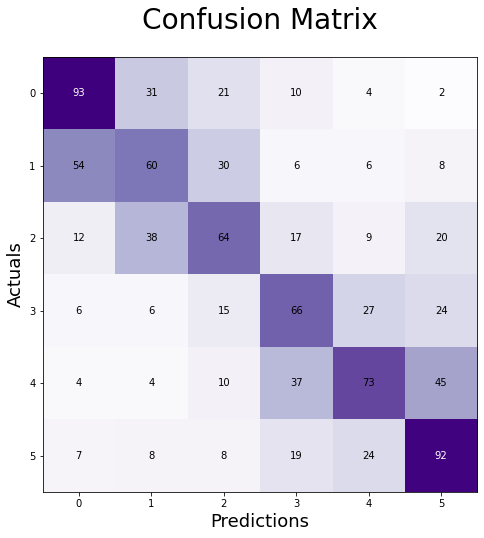

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_confusion_matrix

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(8, 8), cmap=plt.cm.Purples)
plt.xlabel('Predictions', fontsize=18, )
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=28)
plt.show()

## 2.2 Logistic Regression 2
Try to improve it by modifying the parameters of the TF-IDF vector & the model.

In [ ]:
#IDV & DV
X = df_train['sentence'] # Inputs --> IDV
y = df_train['difficulty'] # Outputs wanted --> DV

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Pipeline for TF-IDF with Logistic Regression model
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer(ngram_range=(1, 12), min_df=1, norm='l2', analyzer="char",sublinear_tf=True)), #transformer
    ('lr', LogisticRegression(solver ='lbfgs', penalty='l2', C=5)) #model
])  

    # Fit model on training set
pipe_tvec.fit(X_train, y_train)

    # Predictions
y_pred = pipe_tvec.predict(X_test)

    # Print accuracy on test set
evaluate(y_test, y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ACCURACY SCORE:
0.5167
CLASSIFICATION REPORT:
	Precision: 0.5167
	Recall: 0.5167
	F1_Score: 0.5167


In [ ]:
# Save the results 
LR2Accuracy = accuracy_score(y_test, y_pred)
LR2Precision = precision_score(y_test, y_pred,average='micro')
LR2Recall = recall_score(y_test, y_pred,average='micro')
LR2F1= f1_score(y_test, y_pred,average='micro')

In [ ]:
df_pred = pd.read_csv("/content/drive/MyDrive/DDML/unlabelled_test_data.csv")
x = df_pred["sentence"]
y_predict = pipe_tvec.predict(x)

pred2 = df_pred
pred2["difficulty"] = y_predict
predicsv = pred2[['id','difficulty']]

from google.colab import files
predicsv.to_csv('predictions.csv' ,header = True, index = False)
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2.3. KNN (without data cleaning)
Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.
**KNN 1**

In [ ]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier


# Pipeline for TF-IDF with KNN model
pipe_knn = Pipeline([
    ('tvec', TfidfVectorizer()), #transformer
    ('knn', KNeighborsClassifier()) #model
])

# Fit model on training set
pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)

In [ ]:
# Evaluation
evaluate(y_test, y_pred)

ACCURACY SCORE:
0.3187
CLASSIFICATION REPORT:
	Precision: 0.3187
	Recall: 0.3187
	F1_Score: 0.3187


In [ ]:
# Save the results 
KNN1Accuracy = accuracy_score(y_test, y_pred)
KNN1Precision = precision_score(y_test, y_pred,average='micro')
KNN1Recall = recall_score(y_test, y_pred,average='micro')
KNN1F1= f1_score(y_test, y_pred,average='micro')

Try to improve it by tuning the hyper parameters (n_neighbors, p, weights).

**KNN 2**



In [ ]:
# Pipeline for TF-IDF with KNN model imporving parameters
pipe_knn = Pipeline([
    ('tvec', TfidfVectorizer()), #transformer
    ('knn', KNeighborsClassifier(n_neighbors=140, p=2, weights='distance')) #model
])

# Fit model on training set
pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)

# Evaluation
evaluate(y_test, y_pred)


ACCURACY SCORE:
0.3667
CLASSIFICATION REPORT:
	Precision: 0.3667
	Recall: 0.3667
	F1_Score: 0.3667


In [ ]:
# Save the results 
KNN2Accuracy = accuracy_score(y_test, y_pred)
KNN2Precision = precision_score(y_test, y_pred,average='micro')
KNN2Recall = recall_score(y_test, y_pred,average='micro')
KNN2F1= f1_score(y_test, y_pred,average='micro')

## 2.4. Decision Tree Classifier (without data cleaning)
Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

**Decision Tree Classifier 1**

In [ ]:
# import libraries
from sklearn.tree import DecisionTreeClassifier 

# Pipeline for TF-IDF with Decision Tree Classifier model
pipe_tree = Pipeline([
    ('tvec', TfidfVectorizer()), #transformer
    ('tree', DecisionTreeClassifier()) #model
])

# Fit model on training set
pipe_tree.fit(X_train, y_train)
y_pred = pipe_tree.predict(X_test)

In [ ]:
# Evaluation
evaluate(y_test, y_pred)

ACCURACY SCORE:
0.3104
CLASSIFICATION REPORT:
	Precision: 0.3104
	Recall: 0.3104
	F1_Score: 0.3104


In [ ]:
# Save the results 
DTC1Accuracy = accuracy_score(y_test, y_pred)
DTC1Precision = precision_score(y_test, y_pred,average='micro')
DTC1Recall = recall_score(y_test, y_pred,average='micro')
DTC1F1= f1_score(y_test, y_pred,average='micro')

Try to improve it by tuning the hyper parameters (max_depth, the depth of the decision tree).

**Decision Tree Classifier 2**

In [ ]:
# Pipeline for TF-IDF with Decision Tree Classifier model imporving parameters
pipe_tree = Pipeline([
    ('tvec', TfidfVectorizer()), #transformer
    ('tree', DecisionTreeClassifier(max_depth=15)) #model
])

# Fit model on training set
pipe_tree.fit(X_train, y_train)
y_pred = pipe_tree.predict(X_test)

# Evaluation
evaluate(y_test, y_pred)

ACCURACY SCORE:
0.3177
CLASSIFICATION REPORT:
	Precision: 0.3177
	Recall: 0.3177
	F1_Score: 0.3177


In [ ]:
# Save the results 
DTC2Accuracy = accuracy_score(y_test, y_pred)
DTC2Precision = precision_score(y_test, y_pred,average='micro')
DTC2Recall = recall_score(y_test, y_pred,average='micro')
DTC2F1= f1_score(y_test, y_pred,average='micro')

## 2.5. Random Forest Classifier (without data cleaning)
Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

**Random Forest Classifier 1**

In [ ]:
# import libraries
from sklearn.ensemble import RandomForestClassifier

# Pipeline for TF-IDF with Random Forest Classifier model
pipe_forest = Pipeline([
    ('tvec', TfidfVectorizer()), #transformer
    ('forest', RandomForestClassifier()) #model
])

# Fit model on training set
pipe_forest.fit(X_train, y_train)
y_pred = pipe_forest.predict(X_test)

In [ ]:
# Evaluation
evaluate(y_test, y_pred)

ACCURACY SCORE:
0.4042
CLASSIFICATION REPORT:
	Precision: 0.4042
	Recall: 0.4042
	F1_Score: 0.4042


In [ ]:
# Save the results 
RDF1Accuracy = accuracy_score(y_test, y_pred)
RDF1Precision = precision_score(y_test, y_pred,average='micro')
RDF1Recall = recall_score(y_test, y_pred,average='micro')
RDF1F1= f1_score(y_test, y_pred,average='micro')

**Random Forest Classifier 2**

In [ ]:
# Pipeline for TF-IDF with Random Forest Classifier model imporving parameters
pipe_forest = Pipeline([
    ('tvec', TfidfVectorizer()), #transformer
    ('forest', RandomForestClassifier(max_depth=220, )) #model
])

# Fit model on training set
pipe_forest.fit(X_train, y_train)
y_pred = pipe_forest.predict(X_test)

# Evaluation
evaluate(y_test, y_pred)

ACCURACY SCORE:
0.4271
CLASSIFICATION REPORT:
	Precision: 0.4271
	Recall: 0.4271
	F1_Score: 0.4271


In [ ]:
# Save the results 
RDF2Accuracy = accuracy_score(y_test, y_pred)
RDF2Precision = precision_score(y_test, y_pred,average='micro')
RDF2Recall = recall_score(y_test, y_pred,average='micro')
RDF2F1= f1_score(y_test, y_pred,average='micro')

# 3. Results

In [ ]:
Results = pd.DataFrame({'Model selected': ['Logistic Regression 1', 'Logistic Regression 2', 'KNN','KNN 2','Decision Tree Classifier 1', 
                                           'Decision Tree Classifier 2', 'Random Forest Classifier 1', 'Random Forest Classifier 2'],
                        'Accuracy': [LR1Accuracy,LR2Accuracy, KNN1Accuracy,KNN1Accuracy, DTC1Accuracy, DTC2Accuracy, RDF1Accuracy, RDF2Accuracy],
                        'Precision': [LR1Precision, LR2Precision, KNN1Precision, KNN2Precision, DTC1Precision, DTC2Precision, RDF1Precision,RDF2Precision],
                        'Recall': [LR1Recall, LR2Recall, KNN1Recall, KNN2Recall, DTC1Recall, DTC2Recall, RDF1Recall, RDF2Recall],
                        'F1_Score': [LR1F1, LR2F1, KNN1F1, KNN2F1, DTC1F1, DTC2F1, RDF1F1, RDF2F1]})

Results

,Model selected,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression 1,0.466667,0.466667,0.466667,0.466667
1,Logistic Regression 2,0.516667,0.516667,0.516667,0.516667
2,KNN,0.318750,0.318750,0.318750,0.318750
3,KNN 2,0.318750,0.366667,0.366667,0.366667
4,Decision Tree Classifier 1,0.310417,0.310417,0.310417,0.310417
5,Decision Tree Classifier 2,0.317708,0.317708,0.317708,0.317708
6,Random Forest Classifier 1,0.404167,0.404167,0.404167,0.404167
7,Random Forest Classifier 2,0.427083,0.427083,0.427083,0.427083


**The best model is the following :**

In [ ]:
print(Results.loc[Results.Accuracy == Results.Accuracy.max()][['Model selected','Accuracy']])

          Model selected  Accuracy
1  Logistic Regression 2  0.516667
